In [14]:
from my_perceptron import My_Perceptron
import matplotlib.pyplot as plt
import numpy as np
from sklearn.datasets import load_iris
from sklearn.datasets import fetch_openml 
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import tensorflow as tf
from sklearn.metrics import mean_squared_error

In [15]:
def model_accuracy(y_pred, y_test):
    m_accuracy = 0
    for i in range(len(y_test)):
        if np.argmax(y_pred[i]) ==  np.argmax(y_test[i]):
            m_accuracy = m_accuracy + 1
    m_accuracy = 100 * m_accuracy / len(y_test)
    return m_accuracy

## Regression Test

In [16]:
X = 10 * (np.random.rand(400, 1) - 0.5)
y = np.sin(X) + 0.2 * np.random.randn(400, 1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [17]:
neurons = [10, 5, 1]
act_functions = ['sigmoid', 'sigmoid', 'default']
perc = My_Perceptron(n_neurons=neurons, act_func=act_functions, input_len=1)
perc.fit(X, y, 100, 0.1)
y_pred = perc.predict(X_test)

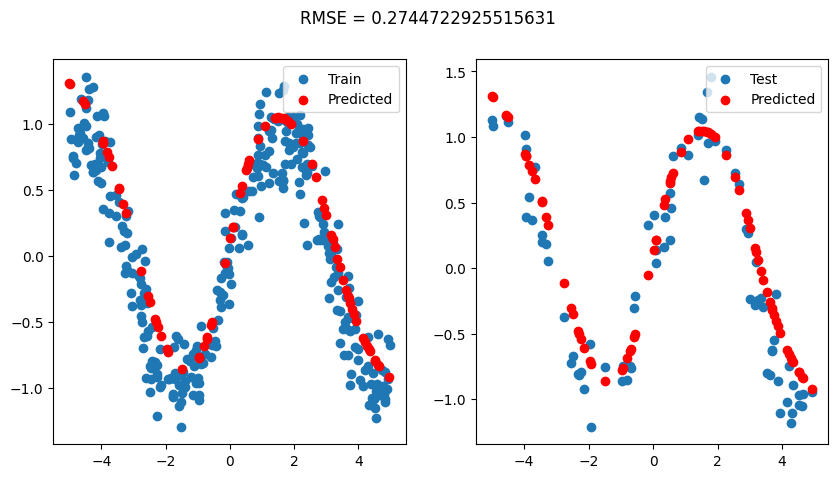

In [18]:
plt.rcParams['figure.figsize'] = [10, 5]
plt.subplot(1, 2, 1)
plt.scatter(X_train, y_train, label='Train')
plt.scatter(X_test, y_pred, c='r', label='Predicted')
plt.legend(loc='upper right')
plt.subplot(1, 2, 2)
plt.scatter(X_test, y_test, label='Test')
plt.scatter(X_test, y_pred, c='r', label='Predicted')
plt.legend(loc='upper right')
plt.suptitle(f'RMSE = {np.sqrt(mean_squared_error(y_test, y_pred))}', fontsize=12)
plt.show()

## Classification Test

#### Iris dataset

In [27]:
iris = load_iris(as_frame=True)
X = iris.data.values
y = tf.keras.utils.to_categorical(iris.target.values)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
std_scaler = StandardScaler()
X_train = std_scaler.fit_transform(X_train)
X_test = std_scaler.transform(X_test)

In [30]:
neurons = [10, 4, 3]
functions = ['sigmoid', 'leaky_relu', 'softmax']
perc = My_Perceptron(n_neurons=neurons, act_func=functions, input_len=4)
perc.fit(X_train, y_train, 100, 0.1)
y_pred = perc.predict(X_test)

In [31]:
iris_accuracy = model_accuracy(y_pred, y_test)
print(f'Accuracy = {iris_accuracy}%')
print('y predicted', np.argmax(y_pred, axis=1))
print('y_test     ', np.argmax(y_test, axis=1))

Accuracy = 96.66666666666667%
y predicted [2 2 1 0 2 0 2 2 2 0 1 1 1 2 1 0 2 1 0 0 2 1 0 0 2 0 1 2 0 0]
y_test      [2 2 1 0 2 0 2 2 2 0 1 2 1 2 1 0 2 1 0 0 2 1 0 0 2 0 1 2 0 0]


#### MNIST

In [22]:
mnist = fetch_openml('mnist_784', as_frame=False)

c:\Users\ladmin\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\datasets\_openml.py:1002: FutureWarning: The default value of `parser` will change from `'liac-arff'` to `'auto'` in 1.4. You can set `parser='auto'` to silence this warning. Therefore, an `ImportError` will be raised from 1.4 if the dataset is dense and pandas is not installed. Note that the pandas parser may return different data types. See the Notes Section in fetch_openml's API doc for details.
  warn(


In [23]:
X, y = mnist.data[:10000], mnist.target[:10000]
y = tf.keras.utils.to_categorical(y.astype(int))
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
std_scaler = StandardScaler()
X_train = std_scaler.fit_transform(X_train)
X_test = std_scaler.transform(X_test)


In [24]:
neurons = [128, 64, 10]
functions = ['sigmoid', 'sigmoid', 'softmax']
perc = My_Perceptron(n_neurons=neurons, act_func=functions, input_len=784)
perc.fit(X_train, y_train, 20, 0.2)
y_pred = perc.predict(X_test)

In [25]:
mnist_accuracy = model_accuracy(y_pred, y_test)
print(f'Accuracy = {mnist_accuracy}%')

Accuracy = 94.15%


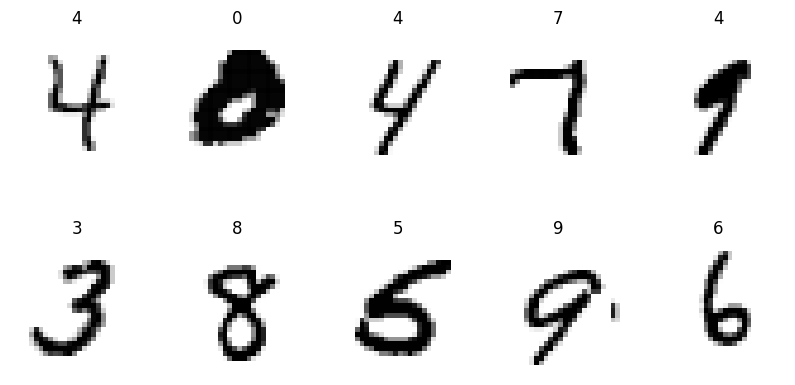

In [26]:
m = 2
n = 5
for j in range(m):
    for i in range(1, n + 1):
        img_test_i = np.atleast_2d(X_test[25 + i - 1 + j * n])
        img = std_scaler.inverse_transform(img_test_i).reshape(28, 28)
        plt.subplot(m, n, i + j * n)
        plt.imshow(img, cmap='binary')
        plt.axis('off')
        number = np.argmax(perc.predict(img_test_i), axis=1)[0]
        plt.title(f'{number}')
plt.show()

As a result:
1) The perceptron is capable of solving the regression problem and has successfully simulated a sine wave.
2) The accuracy on the Iris dataset was close to 100%
3) The accuracy on the MNIST dataset was approximately 94.5%